In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])

In [5]:
data.shape

(891, 4)

## Transformation Types
1. Normalization & Standardization
2. Feature Scaling to Min, Max
3. Scaling to Median and Quantiles
4. Gaussian Transformation

In [9]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
# Fill Age missing values
data['Age'].fillna(data.Age.median(), inplace= True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
pd.DataFrame(data_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

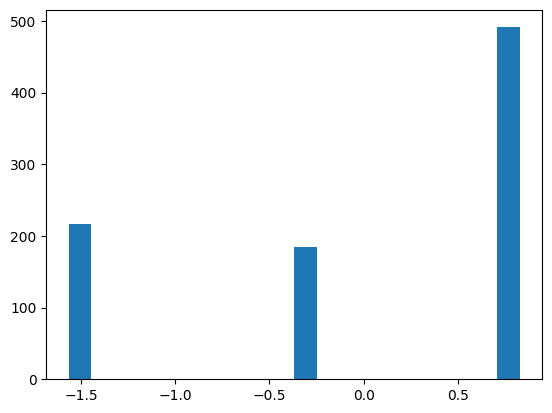

In [15]:
#plot age, fare histograms to check data distribution
plt.hist(data_scaled[:,1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

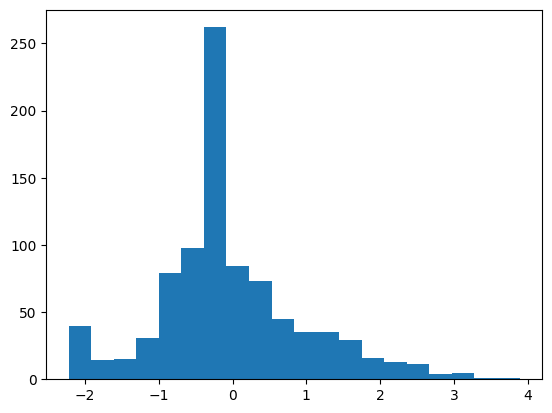

In [17]:
plt.hist(data_scaled[:,2], bins=20) # Age - Gaussian distribution

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

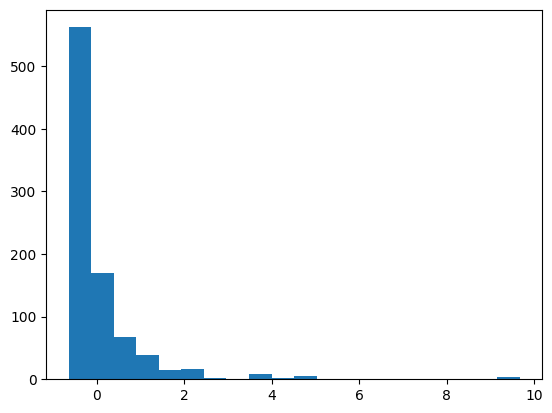

In [18]:
plt.hist(data_scaled[:,3], bins=20) # Fare is right-skewed after transformation

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

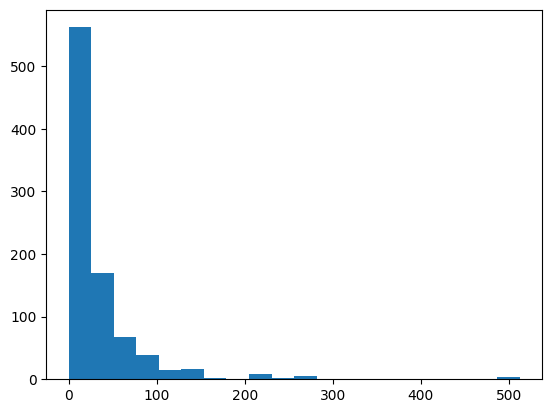

In [19]:
plt.hist(data['Fare'], bins=20) # Far is right-skewed

In [23]:
# MinMax Scaling

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

data_mmScaled = pd.DataFrame(minmaxScaler.fit_transform(data), columns=data.columns)
data_mmScaled

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 184.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

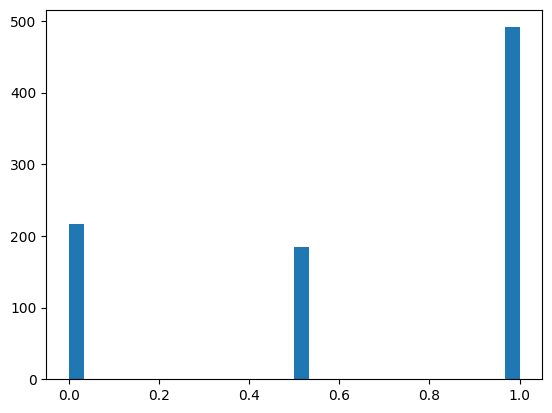

In [25]:
plt.hist(data_mmScaled['Pclass'],bins=30)

(array([ 30.,  14.,  10.,  14.,   3.,  29.,  39.,  65.,  73.,  42., 242.,
         62.,  33.,  47.,  38.,  21.,  28.,  21.,  16.,  14.,  15.,   7.,
          9.,   8.,   4.,   0.,   5.,   1.,   0.,   1.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

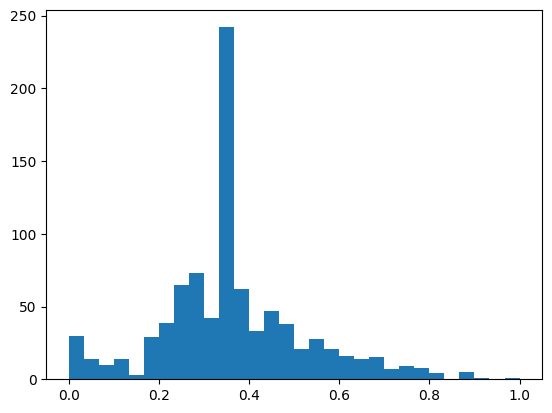

In [26]:
plt.hist(data_mmScaled['Age'],bins=30)

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

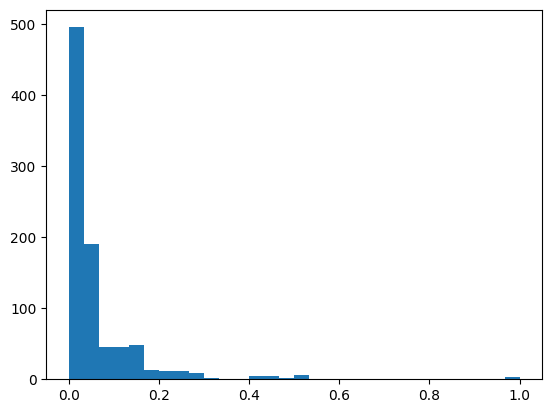

In [27]:
plt.hist(data_mmScaled['Fare'],bins=30)

In [28]:
##RobustScaler based on median and IQR/ Quantiles

from sklearn.preprocessing import RobustScaler

rscaler = RobustScaler()
data_rscale = pd.DataFrame(rscaler.fit_transform(data),columns = data.columns)
data_rscale

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([ 30.,  14.,  10.,  14.,   3.,  29.,  39.,  65.,  73.,  42., 242.,
         62.,  33.,  47.,  38.,  21.,  28.,  21.,  16.,  14.,  15.,   7.,
          9.,   8.,   4.,   0.,   5.,   1.,   0.,   1.]),
 array([-2.12153846, -1.91748718, -1.7134359 , -1.50938462, -1.30533333,
        -1.10128205, -0.89723077, -0.69317949, -0.48912821, -0.28507692,
        -0.08102564,  0.12302564,  0.32707692,  0.53112821,  0.73517949,
         0.93923077,  1.14328205,  1.34733333,  1.55138462,  1.7554359 ,
         1.95948718,  2.16353846,  2.36758974,  2.57164103,  2.77569231,
         2.97974359,  3.18379487,  3.38784615,  3.59189744,  3.79594872,
         4.        ]),
 <BarContainer object of 30 artists>)

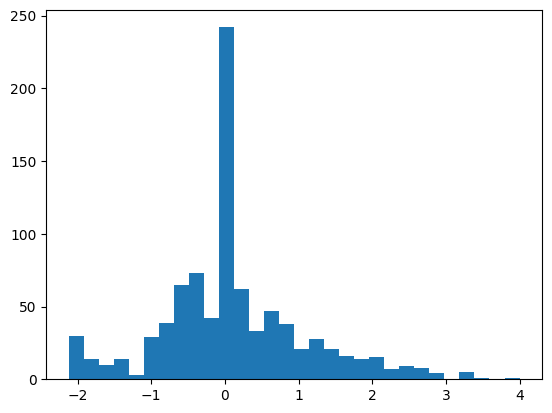

In [30]:
plt.hist(data_rscale['Age'],bins=30)

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.11361998,  0.85324475,  1.59286952,  2.33249428,
         3.07211905,  3.81174382,  4.55136858,  5.29099335,  6.03061811,
         6.77024288,  7.50986765,  8.24949241,  8.98911718,  9.72874194,
        10.46836671, 11.20799148, 11.94761624, 12.68724101, 13.42686578,
        14.16649054, 14.90611531, 15.64574007, 16.38536484, 17.12498961,
        17.86461437, 18.60423914, 19.3438639 , 20.08348867, 20.82311344,
        21.5627382 ]),
 <BarContainer object of 30 artists>)

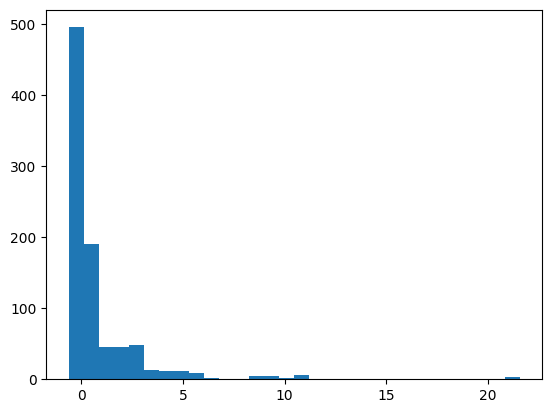

In [31]:
plt.hist(data_rscale['Fare'],bins=30)

In [32]:
## Gaussian distribution
data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
### fillnan
data['Age']=data['Age'].fillna(data['Age'].median())

In [57]:
from scipy import stats
import pylab

#plot Q-Q plot to check whether data is guassian /normalized

def plotQQ(data, feature):
 plt.figure(figsize=(9,4))
 plt.subplot(1,2,1)  
 plt.hist(data[feature],bins= 20)
 plt.subplot(1,2,2)  
 stats.probplot(data[feature],dist='norm' ,plot=pylab)

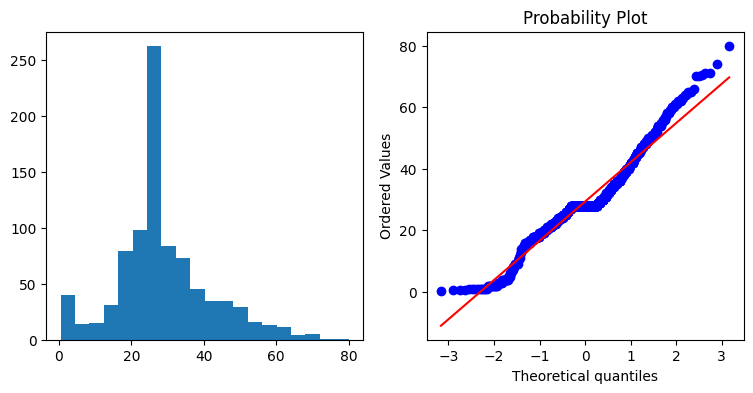

In [58]:
plotQQ(data, 'Age')

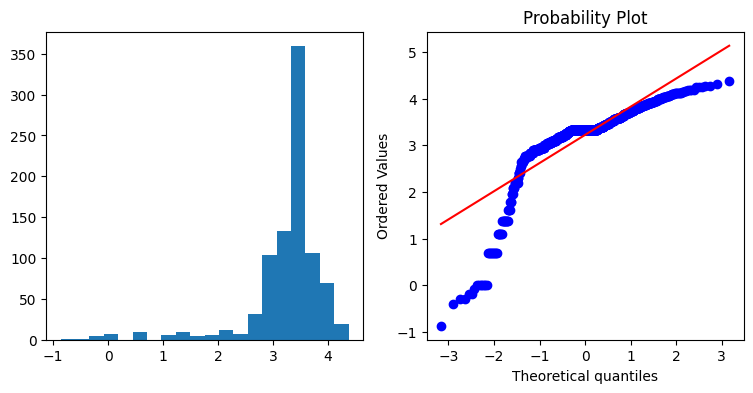

In [59]:
#applied logarithm transformation
data['Age_log']=np.log(data['Age'])
plotQQ(data, 'Age_log')

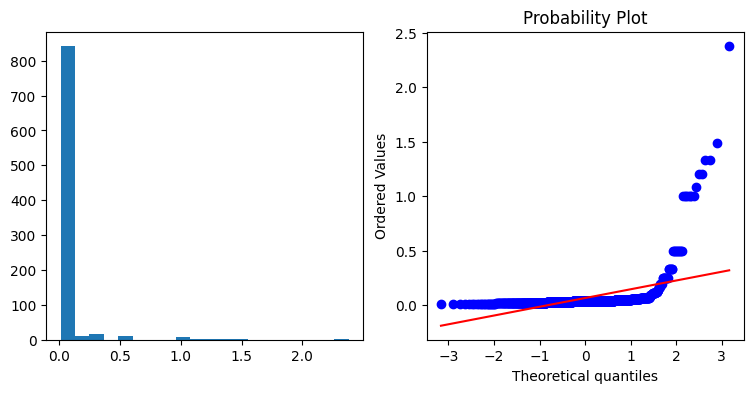

In [62]:
#reciprocal trasnformation
data['Age_Recip']=1/data['Age']
plotQQ(data, 'Age_Recip')

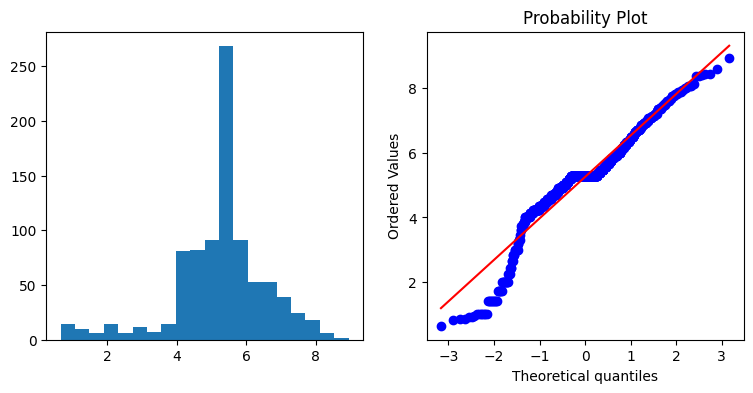

In [63]:
data['Age_SqRt']=data['Age']**(1/2)
plotQQ(data, 'Age_SqRt')

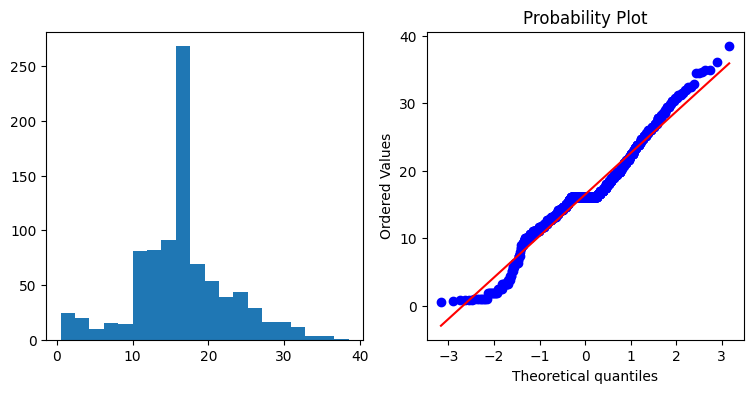

In [64]:
data['Age_Exp']=data['Age']**(1/1.2)
plotQQ(data, 'Age_Exp')

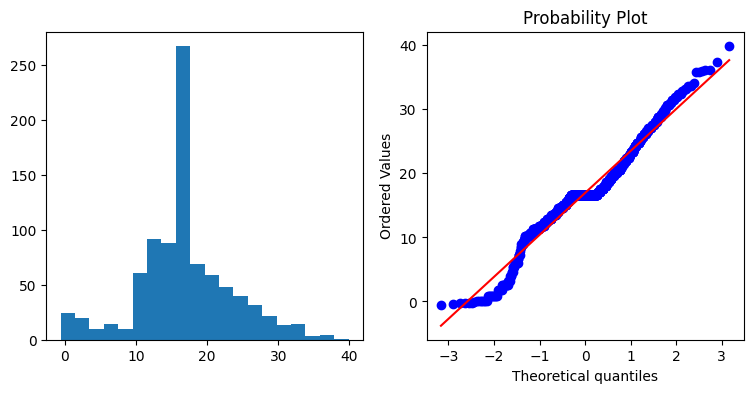

In [65]:
#BoxCox Transformation

data['Age_BoxCox'],parameters =stats.boxcox(data['Age'])
plotQQ(data, 'Age_BoxCox')

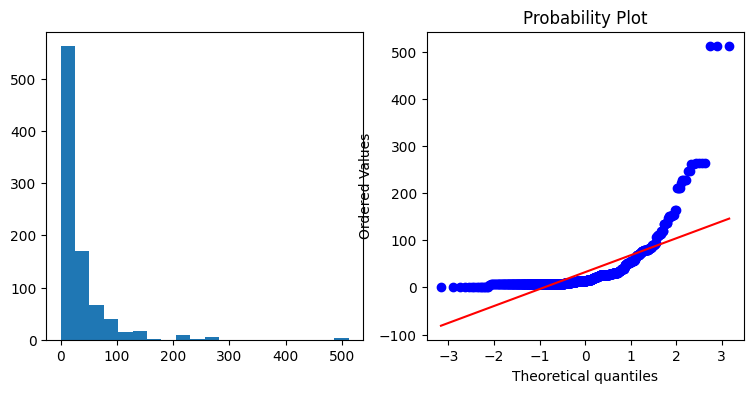

In [66]:
plotQQ(data, 'Fare')

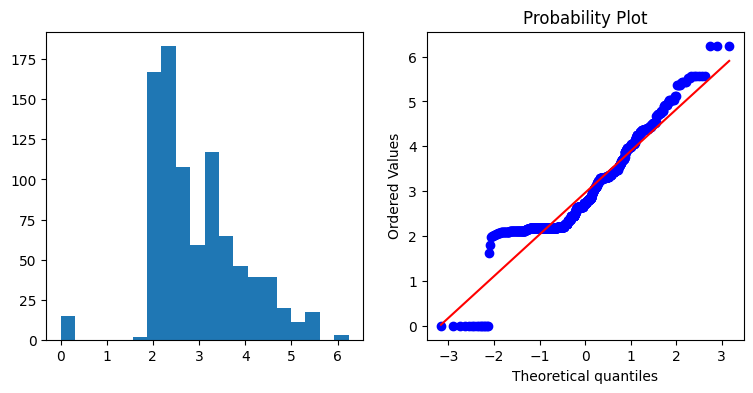

In [67]:
data['Fare_log']=np.log1p(data['Fare'])
plotQQ(data, 'Fare_log')

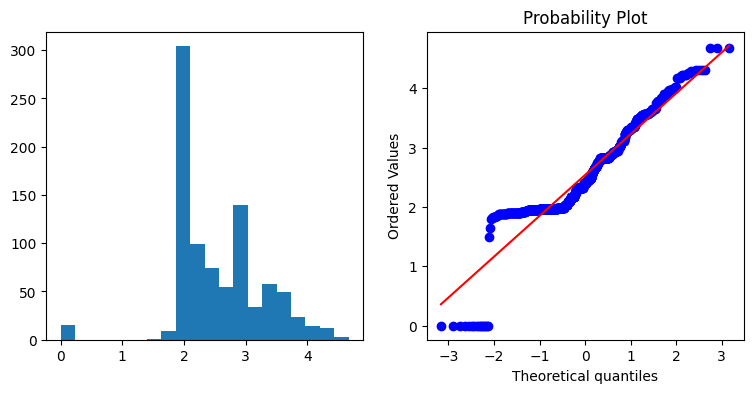

In [70]:
data['Fare_boxCox'],paramters = stats.boxcox(data['Fare']+1)
plotQQ(data, 'Fare_boxCox')